# Zarr SOSE ds - cleaned version

In [32]:
from dask_gateway import Gateway
gateway = Gateway()
options = gateway.cluster_options()

# set the options programatically, or through their HTML repr
options.worker_memory = 30  # 10 GB of memory per worker.

# Create a cluster with those options
cluster = gateway.new_cluster(options)
cluster.scale(30)
client = cluster.get_client()

In [33]:
client

<Client: 'tls://10.8.6.5:8786' processes=0 threads=0, memory=0 B>

In [31]:
client.close()
cluster.close()

In [1]:
import xarray as xr
from matplotlib import pyplot as plt
import gcsfs
import dask
import dask.array as dsa
import numpy as np
import fsspec

## Open SOSE Dataset from the Cloud

In [2]:
fs = gcsfs.GCSFileSystem(requester_pays=True)

mapping = fs.get_mapper('gcs://pangeo-ecco-sose')

ds = xr.open_zarr(mapping, consolidated=True)
ds

<xarray.Dataset>
Dimensions:   (time: 438, Zl: 42, YC: 320, XC: 2160, Z: 42, XG: 2160, YG: 320,
               Zp1: 43, Zu: 42)
Coordinates: (12/26)
    Depth     (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    PHrefC    (Z) float32 dask.array<chunksize=(42,), meta=np.ndarray>
    PHrefF    (Zp1) float32 dask.array<chunksize=(43,), meta=np.ndarray>
  * XC        (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.6 359.8 359.9
  * XG        (XG) float32 5.551e-17 0.1667 0.3333 0.5 ... 359.5 359.7 359.8
  * YC        (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -25.04 -24.87 -24.71
    ...        ...
    iter      (time) int64 dask.array<chunksize=(438,), meta=np.ndarray>
    rA        (YC, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAs       (YG, XC) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAw       (YC, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
    rAz       (YG, XG) float32 dask.array<chunksize=(320, 2160), meta=np.ndarray>
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables: (12/56)
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ...        ...
    oceFreez  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceQsw    (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceTAUX   (time, YC, XG) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceTAUY   (time, YG, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surForcS  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surForcT  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>

In [3]:
coords = ds.coords.to_dataset().reset_coords()
dsr = ds.reset_coords(drop=True)
dsr

<xarray.Dataset>
Dimensions:   (time: 438, Zl: 42, YC: 320, XC: 2160, Z: 42, XG: 2160, YG: 320,
               Zp1: 43, Zu: 42)
Coordinates:
  * XC        (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.6 359.8 359.9
  * XG        (XG) float32 5.551e-17 0.1667 0.3333 0.5 ... 359.5 359.7 359.8
  * YC        (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -25.04 -24.87 -24.71
  * YG        (YG) float32 -77.96 -77.79 -77.62 -77.46 ... -25.12 -24.96 -24.79
  * Z         (Z) float32 -5.0 -15.5 -27.0 ... -5.075e+03 -5.325e+03 -5.575e+03
  * Zl        (Zl) float32 0.0 -10.0 -21.0 ... -4.95e+03 -5.2e+03 -5.45e+03
  * Zp1       (Zp1) float32 0.0 -10.0 -21.0 ... -5.2e+03 -5.45e+03 -5.7e+03
  * Zu        (Zu) float32 -10.0 -21.0 -33.0 ... -5.2e+03 -5.45e+03 -5.7e+03
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables: (12/56)
    ADVr_SLT  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVr_TH   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_SLT  (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVx_TH   (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_SLT  (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ADVy_TH   (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    ...        ...
    oceFreez  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceQsw    (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceTAUX   (time, YC, XG) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    oceTAUY   (time, YG, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surForcS  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>
    surForcT  (time, YC, XC) float32 dask.array<chunksize=(1, 320, 2160), meta=np.ndarray>

In [4]:
ds_tns = xr.merge([dsr.THETA, dsr.SALT])
ds_tns

<xarray.Dataset>
Dimensions:  (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC       (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.4 359.6 359.8 359.9
  * YC       (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -25.04 -24.87 -24.71
  * Z        (Z) float32 -5.0 -15.5 -27.0 ... -5.075e+03 -5.325e+03 -5.575e+03
  * time     (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
Data variables:
    THETA    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    SALT     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
Attributes:
    long_name:      Potential Temperature
    standard_name:  THETA
    units:          degC

In [5]:
ds_vel = xr.merge([dsr.UVEL, dsr.VVEL, dsr.WVEL, dsr.WSLTMASS, dsr.WTHMASS])
ds_vel

<xarray.Dataset>
Dimensions:   (XG: 2160, YC: 320, Z: 42, time: 438, XC: 2160, YG: 320, Zl: 42)
Coordinates:
  * XG        (XG) float32 5.551e-17 0.1667 0.3333 0.5 ... 359.5 359.7 359.8
  * YC        (YC) float32 -77.87 -77.71 -77.54 -77.37 ... -25.04 -24.87 -24.71
  * Z         (Z) float32 -5.0 -15.5 -27.0 ... -5.075e+03 -5.325e+03 -5.575e+03
  * time      (time) datetime64[ns] 2005-01-06 2005-01-11 ... 2010-12-31
  * XC        (XC) float32 0.08333 0.25 0.4167 0.5833 ... 359.6 359.8 359.9
  * YG        (YG) float32 -77.96 -77.79 -77.62 -77.46 ... -25.12 -24.96 -24.79
  * Zl        (Zl) float32 0.0 -10.0 -21.0 ... -4.95e+03 -5.2e+03 -5.45e+03
Data variables:
    UVEL      (time, Z, YC, XG) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    VVEL      (time, Z, YG, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    WVEL      (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    WSLTMASS  (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    WTHMASS   (time, Zl, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
Attributes:
    long_name:      Zonal Component of Velocity (m/s)
    mate:           VVEL
    standard_name:  UVEL
    units:          m/s

## Create xgcm grid

[Xgcm](http://xgcm.readthedocs.io) is a package which helps with the analysis of GCM data.

In [6]:
import xgcm
grid = xgcm.Grid(ds, periodic=('X', 'Y'))
grid

<xgcm.Grid>
X Axis (periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
Z Axis (periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center
T Axis (periodic, boundary=None):
  * center   time
Y Axis (periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center

## Tracer Budgets

Here we will do the heat and salt budgets for SOSE. In integral form, these budgets can be written as

$$
\mathcal{V} \frac{\partial S}{\partial t} = G^S_{adv} + G^S_{diff} + G^S_{surf} + G^S_{linfs}
$$


$$
\mathcal{V} \frac{\partial \theta}{\partial t} = G^\theta_{adv} + G^\theta_{diff} + G^\theta_{surf} + G^\theta_{linfs} + G^\theta_{sw}
$$

where $\mathcal{V}$ is the volume of the grid cell. The terms on the right-hand side are called _tendencies_. They add up to the total tendency (the left hand side).

The first term is the convergence of advective fluxes. The second is the convergence of diffusive fluxes. The third is the explicit surface flux. The fourth is the correction due to the linear free-surface approximation. The fifth is shortwave penetration (only for temperature).

### Flux Divergence

First we define a function to calculate the convergence of the advective and diffusive fluxes, since this has to be repeated for both tracers.

To fix scatter heat plot: 
- Maybe I need to divide by area? https://xgcm.readthedocs.io/en/latest/example_mitgcm.html#Creating-the-grid-object
- Maybe chunking?

In [7]:
def tracer_flux_budget(suffix):
    """Calculate the convergence of fluxes of tracer `suffix` where 
    `suffix` is `TH` or `SLT`. Return a new xarray.Dataset."""
    conv_horiz_adv_flux = -(grid.diff(dsr['ADVx_' + suffix], 'X') +
                          grid.diff(dsr['ADVy_' + suffix], 'Y')).rename('conv_horiz_adv_flux_' + suffix)
    conv_horiz_diff_flux = -(grid.diff(dsr['DFxE_' + suffix], 'X') +
                          grid.diff(dsr['DFyE_' + suffix], 'Y')).rename('conv_horiz_diff_flux_' + suffix)
    # sign convention is opposite for vertical fluxes
    conv_vert_adv_flux = grid.diff(dsr['ADVr_' + suffix], 'Z', boundary='fill').rename('conv_vert_adv_flux_' + suffix)
    conv_vert_diff_flux = (grid.diff(dsr['DFrE_' + suffix], 'Z', boundary='fill') +
                           grid.diff(dsr['DFrI_' + suffix], 'Z', boundary='fill') +
                           grid.diff(dsr['KPPg_' + suffix], 'Z', boundary='fill')).rename('conv_vert_diff_flux_' + suffix)
    
    all_fluxes = [conv_horiz_adv_flux, conv_horiz_diff_flux, conv_vert_adv_flux, conv_vert_diff_flux]
    #conv_all_fluxes = sum(all_fluxes).rename('conv_total_flux_' + suffix)
    #return xr.merge(all_fluxes + [conv_all_fluxes])
    #units: <tracer>m^3/s
    return xr.merge(all_fluxes)

In [8]:
# sum of all converging adv/diff fluxes
budget_slt = tracer_flux_budget('SLT')
budget_slt

<xarray.Dataset>
Dimensions:                   (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                        (XC) float32 0.08333 0.25 0.4167 ... 359.8 359.9
  * YC                        (YC) float32 -77.87 -77.71 ... -24.87 -24.71
  * Z                         (Z) float32 -5.0 -15.5 ... -5.325e+03 -5.575e+03
  * time                      (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>

In [9]:
budget_th = tracer_flux_budget('TH')
budget_th

<xarray.Dataset>
Dimensions:                  (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 0.08333 0.25 0.4167 ... 359.8 359.9
  * YC                       (YC) float32 -77.87 -77.71 -77.54 ... -24.87 -24.71
  * Z                        (Z) float32 -5.0 -15.5 ... -5.325e+03 -5.575e+03
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>

In [10]:
#SOSE already has tendency terms, unlike ECCO
#adding vol-weighted total tendency per sec

volume = (coords.drF * coords.rA * coords.hFacC)
#client.scatter(volume)
day2seconds = (24*60*60)

budget_th['total_tendency_TH_truth'] = (dsr.TOTTTEND * volume) / day2seconds
budget_slt['total_tendency_SLT_truth'] = (dsr.TOTSTEND * volume) / day2seconds

### Surface Fluxes

The surface fluxes are only active in the top model layer. We need to specify some constants to convert to the proper units and scale factors to convert to integral form. They also require some xarray special sauce to merge with the 3D variables.

In [11]:
# constants
heat_capacity_cp = 3.994e3 #J/kg/˚C
runit2mass = 1.035e3 #rho

# treat the shortwave flux separately from the rest of the surface flux
surf_flux_th = (dsr.TFLUX - dsr.oceQsw) * coords.rA / (heat_capacity_cp * runit2mass)
lin_fs_correction_th = -(dsr.WTHMASS.isel(Zl=0, drop=True) * coords.rA)

#sw flux
surf_flux_th_sw = dsr.oceQsw * coords.rA / (heat_capacity_cp * runit2mass)

# salt
surf_flux_slt = dsr.SFLUX * coords.rA  / runit2mass
lin_fs_correction_slt = -(dsr.WSLTMASS.isel(Zl=0, drop=True) * coords.rA)
#units: (˚C m^3)/s

# in order to align the surface fluxes with the rest of the 3D budget terms,
# we need to give them a z coordinate. We can do that with this function
#ex nb:
#https://github.com/pangeo-data/pangeo/blob/7415a07bc8a72c3242adebc2bbb6b301131954f7/use_cases/physical-oceanography/SOSE.ipynb
def surface_to_3d(da):
    da = da.copy()
    da.coords['Z'] = dsr.Z[0]
    da = da.expand_dims(dim='Z', axis=1)
    da, _ = xr.align(da, coords.hFacC, join='right')
    return da.fillna(0.)

### Shortwave Flux

Special treatment is needed for the shortwave flux, which penetrates into the interior of the water column

In [12]:
def swfrac(coords, fact=1., jwtype=2):
    """Clone of MITgcm routine for computing sw flux penetration.
    z: depth of output levels"""
    
    rfac = [0.58 , 0.62, 0.67, 0.77, 0.78]
    a1 = [0.35 , 0.6  , 1.0  , 1.5  , 1.4]
    a2 = [23.0 , 20.0 , 17.0 , 14.0 , 7.9 ]
    
    facz = fact * coords.Zl.sel(Zl=slice(0, -200))
    j = jwtype-1
    swdk = (rfac[j] * np.exp(facz / a1[j]) +
            (1-rfac[j]) * np.exp(facz / a2[j]))
            
    return swdk.rename('swdk')

_, swdown = xr.align(dsr.Zl, surf_flux_th_sw * swfrac(coords), join='left', )
swdown = swdown.fillna(0)

In [13]:
budget_th = xr.merge([budget_th, 
                      surface_to_3d(surf_flux_th).rename('surface_flux_conv_TH'), 
                      surface_to_3d(lin_fs_correction_th).rename('lin_fs_correction_TH'),
                    (-grid.diff(swdown, 'Z', boundary='fill').fillna(0.)).rename('sw_flux_conv_TH')])
budget_th = budget_th.chunk({'XC':-1, 'YC':-1, 'Z':-1, 'time':1})
budget_th

<xarray.Dataset>
Dimensions:                  (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                       (XC) float32 0.08333 0.25 0.4167 ... 359.8 359.9
  * YC                       (YC) float32 -77.87 -77.71 -77.54 ... -24.87 -24.71
  * Z                        (Z) float32 -5.0 -15.5 ... -5.325e+03 -5.575e+03
  * time                     (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_diff_flux_TH  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_adv_flux_TH    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_TH   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    total_tendency_TH_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    surface_flux_conv_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    lin_fs_correction_TH     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    sw_flux_conv_TH          (time, YC, XC, Z) float32 dask.array<chunksize=(1, 320, 2160, 42), meta=np.ndarray>

In [14]:
budget_slt = xr.merge([budget_slt, 
                       surface_to_3d(surf_flux_slt).rename('surface_flux_conv_SLT'),
                       surface_to_3d(lin_fs_correction_slt).rename('lin_fs_correction_SLT')])
budget_slt = budget_slt.chunk({'XC':-1, 'YC':-1, 'Z':-1, 'time':1})
budget_slt

<xarray.Dataset>
Dimensions:                   (XC: 2160, YC: 320, Z: 42, time: 438)
Coordinates:
  * XC                        (XC) float32 0.08333 0.25 0.4167 ... 359.8 359.9
  * YC                        (YC) float32 -77.87 -77.71 ... -24.87 -24.71
  * Z                         (Z) float32 -5.0 -15.5 ... -5.325e+03 -5.575e+03
  * time                      (time) datetime64[ns] 2005-01-06 ... 2010-12-31
Data variables:
    conv_horiz_adv_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_horiz_diff_flux_SLT  (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_adv_flux_SLT    (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    conv_vert_diff_flux_SLT   (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    total_tendency_SLT_truth  (time, Z, YC, XC) float64 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    surface_flux_conv_SLT     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>
    lin_fs_correction_SLT     (time, Z, YC, XC) float32 dask.array<chunksize=(1, 42, 320, 2160), meta=np.ndarray>

## **Quick check**

In [15]:
mask = coords.hFacC[0]>0

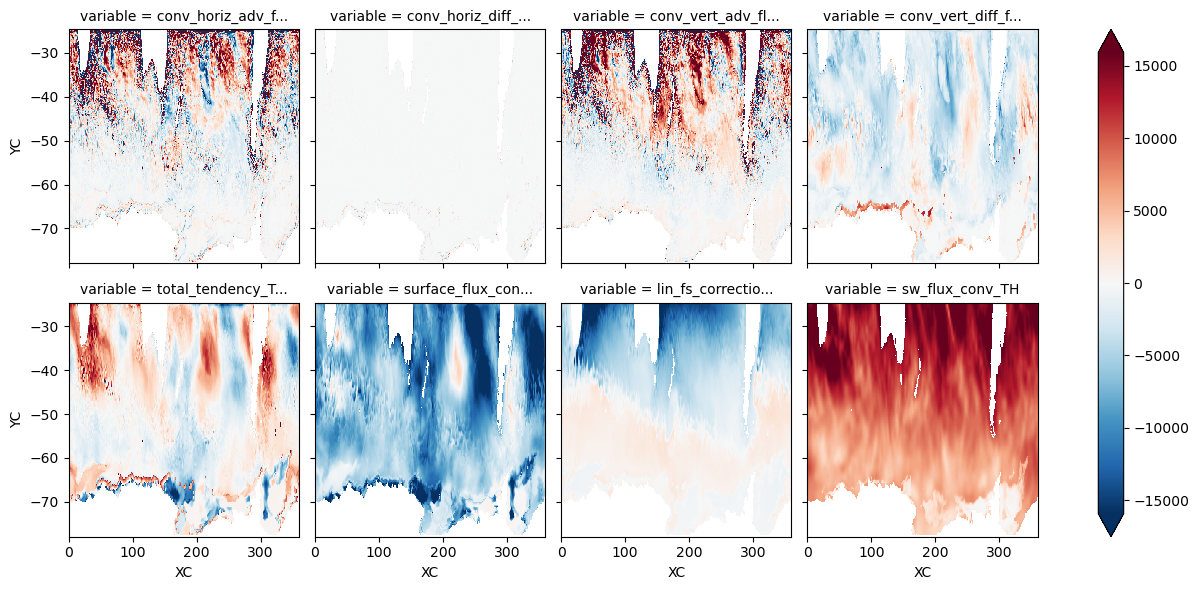

In [16]:
budget_th.where(mask).isel(time=0, Z=0).to_array().plot(col='variable', col_wrap=4, 
                                                        robust=True)#, vmin=-4e5, vmax=4e4);

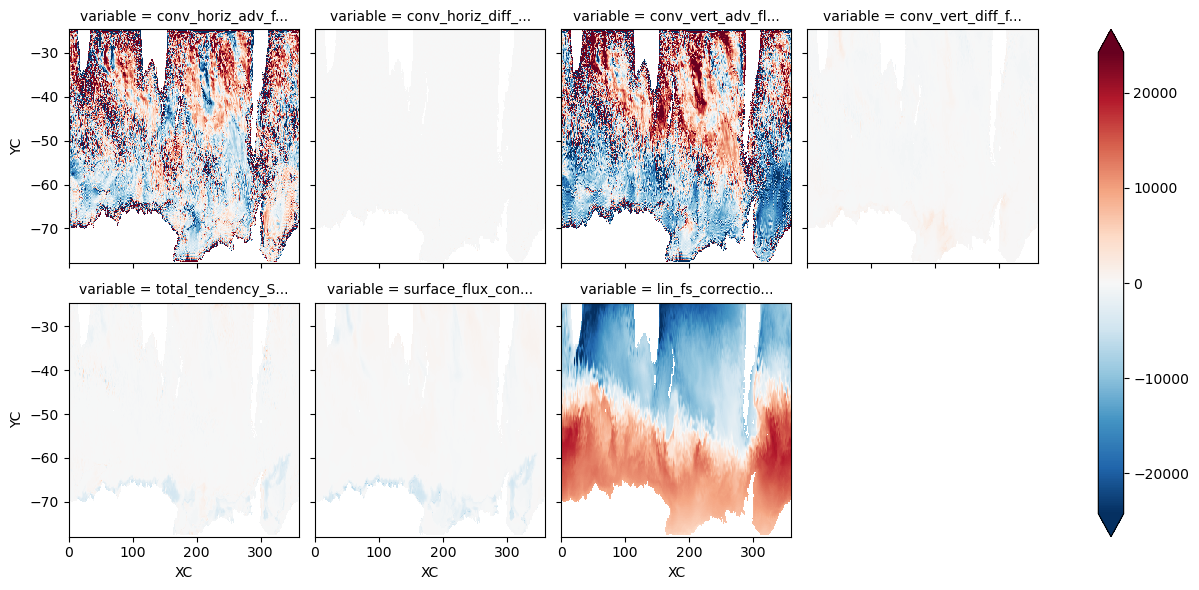

In [17]:
budget_slt.where(mask).isel(time=0, Z=0).to_array().plot(col='variable', col_wrap=4, 
                                                        robust=True)#, vmin=-4e5, vmax=4e4);

### TEMP check

In [25]:
lhs = budget_th.total_tendency_TH_truth

In [23]:
#sum all terms except for tottend
rhs = budget_th.to_array().sum('variable') - budget_th.total_tendency_TH_truth

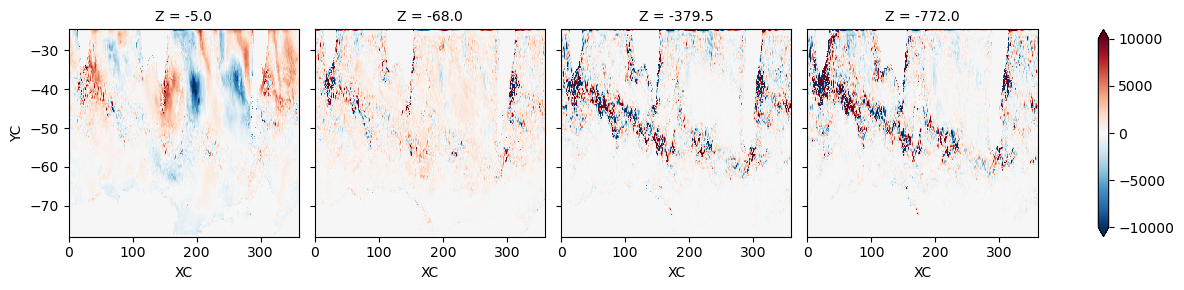

In [24]:
rhs.isel(time=10, Z=[0, 5, 15, 20]).plot(col='Z', vmin=-1e4, vmax=1e4, cmap='RdBu_r');

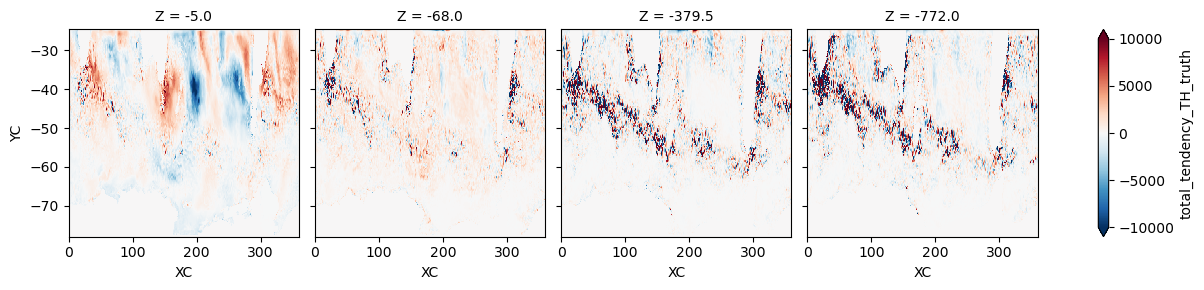

In [21]:
lhs.isel(time=10, Z=[0, 5, 15, 20]).plot(col='Z', vmin=-1e4, vmax=1e4, cmap='RdBu_r');

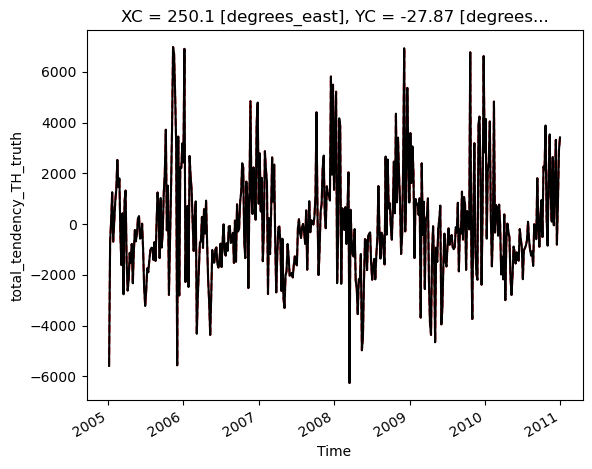

In [37]:
rhs.isel(Z=0, YC=300, XC=1500).plot(label='rhs', color='r', linestyle='dashed')
lhs.isel(Z=0, YC=300, XC=1500).plot(label='lsh', color='k')

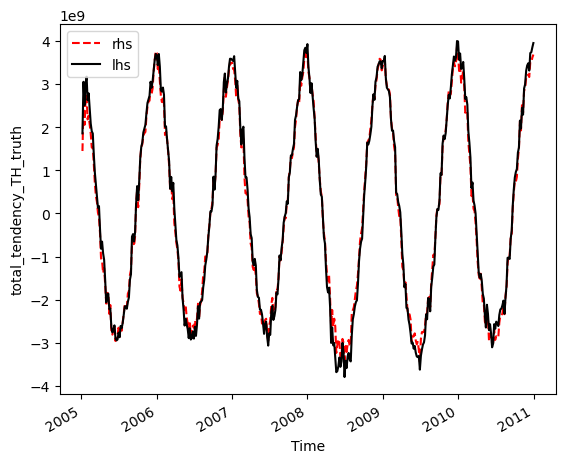

In [34]:
rhs.sum(('Z', 'YC', 'XC')).plot(label='rhs', color='r', linestyle='dashed')
lhs.sum(('Z', 'YC', 'XC')).plot(label='lhs', color='k')
plt.legend();

### SALT check

In [38]:
lhs = budget_slt.total_tendency_SLT_truth

In [39]:
#sum all terms except for tottend
rhs = budget_slt.to_array().sum('variable') - budget_slt.total_tendency_SLT_truth

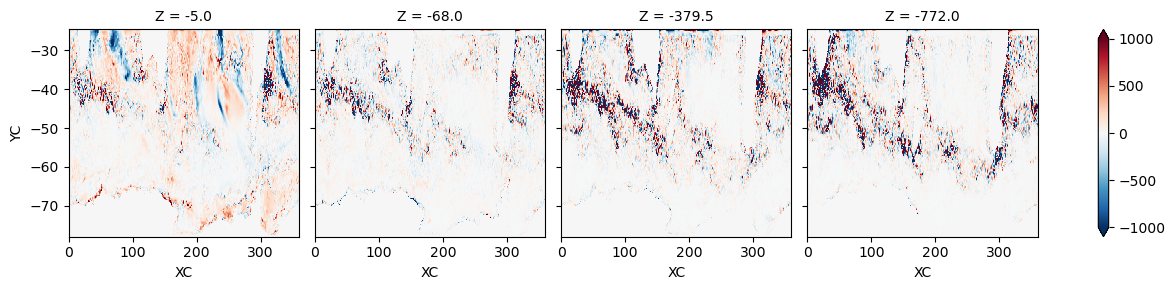

In [46]:
rhs.isel(time=10, Z=[0, 5, 15, 20]).plot(col='Z', vmin=-1e3, vmax=1e3, cmap='RdBu_r');

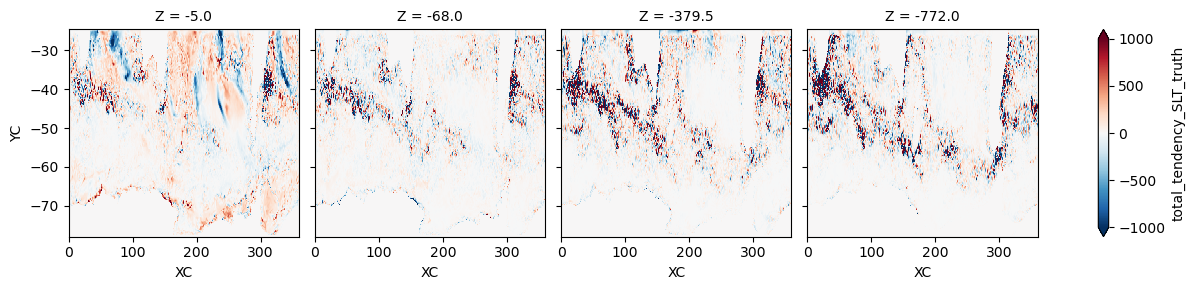

In [45]:
lhs.isel(time=10, Z=[0, 5, 15, 20]).plot(col='Z', vmin=-1e3, vmax=1e3, cmap='RdBu_r');

In [47]:
rhs.isel(Z=0, YC=300, XC=1500).plot(label='rhs', color='r', linestyle='dashed')
lhs.isel(Z=0, YC=300, XC=1500).plot(label='lsh', color='k')

KilledWorker: Attempted to run task ('open_dataset-5d8fe1393dc8094240c9777312d4b431DFxE_SLT-c60c852d4f28b9e21ca3955effa6b296', 147, 0, 0, 0) on 3 different workers, but all those workers died while running it. The last worker that attempt to run the task was tls://10.8.3.3:43339. Inspecting worker logs is often a good next step to diagnose what went wrong. For more information see https://distributed.dask.org/en/stable/killed.html.

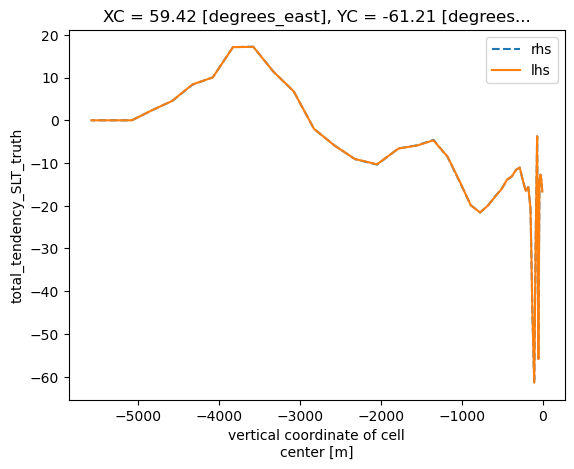

In [50]:
rhs[200,:,100,356].plot(label='rhs', linestyle='--')
lhs[200,:,100,356].plot(label='lhs')
plt.legend();

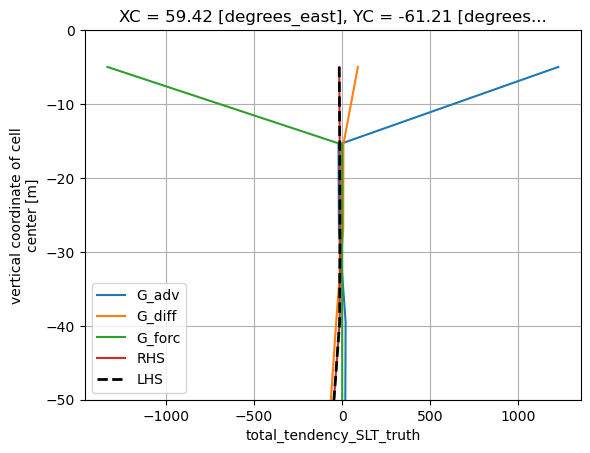

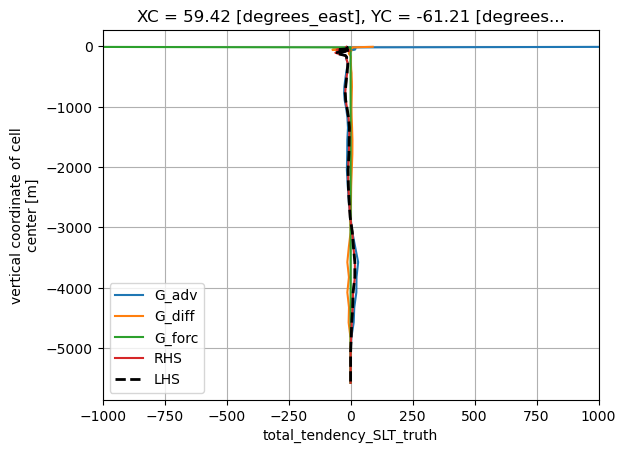

In [52]:
for xlim in [None, 1e3]:
    plt.figure()
    (budget_slt.conv_horiz_adv_flux_SLT[200,:,100,356] + budget_slt.conv_vert_adv_flux_SLT[200,:,100,356]).plot(y='Z', label='G_adv')
    (budget_slt.conv_horiz_diff_flux_SLT[200,:,100,356] + budget_slt.conv_vert_diff_flux_SLT[200,:,100,356]).plot(y='Z', label='G_diff')
    (budget_slt.surface_flux_conv_SLT[200,:,100,356] + budget_slt.lin_fs_correction_SLT[200,:,100,356]).plot(y='Z', label='G_forc')
    rhs[200,:,100,356].plot(y='Z', label='RHS')   
    budget_slt.total_tendency_SLT_truth[200,:,100,356].plot(y='Z', label='LHS', color='k', ls='--', linewidth=2)   
    if xlim:
        plt.xlim([-xlim, xlim])
    else:
        plt.ylim([-50, 0])

    plt.grid()
    plt.legend()

## Saving Data

In [54]:
import json
with open('/home/jovyan/pangeo-181919-f141378dc975.json') as token_file:
    token = json.load(token_file)
gcfs_w_token = gcsfs.GCSFileSystem(token=token)

In [55]:
#saving salt budget
gcsmap_slt = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/models/SOSE/budget_slt.zarr')
budget_slt.to_zarr(gcsmap_slt, mode='w') #writing the dataset into a file with the specified path

In [57]:
#saving heat budget
gcsmap_th = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/models/SOSE/budget_th.zarr')
budget_th.to_zarr(gcsmap_th, mode='w')

In [58]:
client.restart()

<Client: 'tls://10.8.6.5:8786' processes=0 threads=0, memory=0 B>

In [59]:
#saving unrolled coords
gcsmap_coords = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/models/SOSE/coords.zarr')
coords.to_zarr(gcsmap_coords, mode='w')

In [60]:
#saving unrolled T/S vars
gcsmap_tns = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/models/SOSE/ds_tns.zarr')
ds_tns.to_zarr(gcsmap_tns, mode='w')

In [61]:
#saving unrolled velocity vars
gcsmap_vel = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/models/SOSE/ds_vel.zarr')
ds_vel.to_zarr(gcsmap_vel, mode='w')

In [63]:
ds_SIempmr = dsr.SIempmr.to_dataset()

In [65]:
#saving unrolled ocean surf fw flux 
gcsmap_empmr = gcfs_w_token.get_mapper('pangeo-tmp/stb2145/SOSE/datasets/ds_SIempmr.zarr')
ds_SIempmr.to_zarr(gcsmap_empmr, mode='w')

## WG entire column

In [4]:
#WG boundaries (80˚S, 56˚S, 65˚W, 30˚E)
#WG model's boundaries after .roll(XC=700) (-77.87497˚S, -62.041634˚S; 295.08334W, 30.083334E)
lower_lat = 0
upper_lat = 125 #-57.041634
upper_lat_old = 95
left_lon =  310
right_lon = 880

In [5]:
#set the boundaries
lat_range = dict(YC=slice(lower_lat, upper_lat))
lat_range_old = dict(YC=slice(lower_lat, upper_lat_old))
lon_range = dict(XC=slice(left_lon, right_lon))

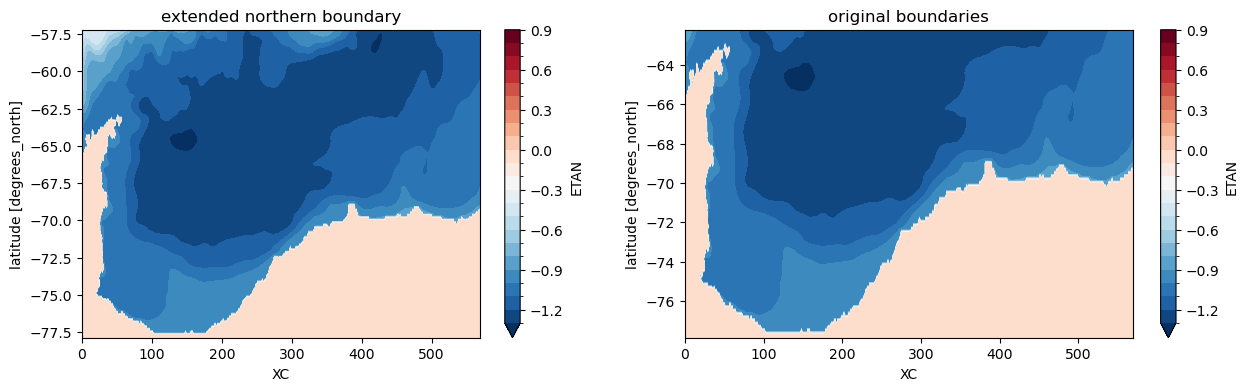

In [16]:
#57˚S
fig, (ax0,ax1) = plt.subplots(1,2, figsize=(15,4), gridspec_kw={'width_ratios': [2.4,2.7]})
dsr.ETAN.roll(XC=700).isel(**lat_range, **lon_range).drop('XC').mean('time').plot.contourf(levels=np.arange(-1.3,1,0.1), ax=ax0)
dsr.ETAN.roll(XC=700).isel(**lat_range_old, **lon_range).drop('XC').mean('time').plot.contourf(levels=np.arange(-1.3,1,0.1), ax=ax1)

ax0.set_title('extended northern boundary')
ax1.set_title('original boundaries');